 # Capstone Project 2 - Data Story
## Name: Brock Nosbisch

#### Summary:

...........................

Here are the definitions of the fields used in this project:
* CIS Division: Company
* Account ID: An account is owned by 1 person but can have multiple Service Agreements.
* Customer Class: Account level customer class.
* Person ID: A person can have multiple accounts.
* SA Start: The Service Agreement's Start Date (when gas started).
* SA End: The Service Agreement's End Date (when gas stopped).
* SA Status: The current SA status.
* SA Type: The Service Agreement's type (example: Gas Residential).
* Rate Class: Determines how the SA is billed.
* Premise ID: Unique identifier for an address.
* City: Premise's City
* State: Premise's State
* Postal: Premise's Zip Code
* Bill Cycle: How we know when to bill an Account.
* Service Type: Always Gas.
* Premise Type: Premise Type (example: Commercial).
* Office Location: Closest office to premise.
* DNP Started Flag: Was the previous stop a DNP.
* DNP Stopped Flag: Did the current SA Stop because of DNP.
* Internal Credit Rating: The internal credit rating for an Account.
* Premise Level 12 Month DNP Flag: Has the Premise had a DNP in the last 12 months.
* Account Level 12 Month DNP Flag: Has the Account had a DNP in the last 12 months.
* Person Received 18 Months Pledge: Has the Person received a Pledge in the last 18 months.
* Payments in Last 18 Months: How many payments have been made for the SA in the last 18 months.
* Bills in Last 18 Months: How many bills were billed for the SA in the last 18 months.
* Arrears Current/Payoff Amount: How much money is past due for the SA.
* Total Current/Payoff Amount: How much money is owed for the SA.
* Most Recent Payment Date: What was the most recent Payment Date.
* Late Payment Count: How many late payments were charged to the SA in the past 18 months.
* Seasonal Flags (1 year ago, 2 year ago, 3 year ago: Did the premise turn off between 3/1 and 6/30 and then turn on between 8/1 and 12/31.
* SA Start/End Degree: What was the Degree Days on the SA Start and SA End dates.
* Stop/Start Flags: Flags to show if the SA started/stopped in a given year.
* Pledge Date/Flag: The Pledge Date and Flag for each year.
* Usage in Last 18 Months: The Usage billed in the past 18 months.
* Person/Premise Min/Max SA Start/End Dates: What are the minimum and maximomum start and end dates at a Person or Premise level.
* Person/Premise Days Active/Inactive Before: How many days was the previous SA for the Person or Premise Active or Inactive for.
* Stop Days from 20180301: Flags to use for training/testing.  This should be dynamic but we are hardcoding the value for now.

# Load Data

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from datetime import datetime, date


# Functions #

def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 
        


file_name = 'data_wrangling_out.csv' # Service Agreement Level

df=pd.DataFrame()

# Read in the file with new column names.
df = pd.read_csv(file_name, header=0)

df.set_index('SA_ID', inplace=True)


# Change Data Types #
df = df.astype({'ACCOUNT_ID':'str', 
                'PERSON_ID':'str', 
                'SA_STATUS_FLAG':'str', 
                'PREMISE_ID':'str',
                'POSTAL':'str',
                'SA_START_YEAR':'str',
                'SA_START_YEAR_MONTH':'str',
                'SA_END_YEAR':'str',
                'SA_END_YEAR_MONTH':'str',
                'SA_START_DATE':'datetime64[ns]',
                'SA_END_DATE':'datetime64[ns]',
                'MOST_RECENT_PAYMENT_DATE':'datetime64[ns]',
                'PERSON_MAX_SA_START_DATE':'datetime64[ns]',
                'PERSON_MIN_SA_START_DATE':'datetime64[ns]',   
                'PERSON_MAX_SA_END_DATE':'datetime64[ns]',
                'PERSON_MIN_SA_END_DATE':'datetime64[ns]',
                'PREMISE_MAX_SA_START_DATE':'datetime64[ns]',
                'PREMISE_MIN_SA_START_DATE':'datetime64[ns]',
                'PREMISE_MAX_SA_END_DATE':'datetime64[ns]',
                'PREMISE_MIN_SA_END_DATE':'datetime64[ns]',
                'PREMISE_PRIOR_STOP_DATE':'datetime64[ns]',
                'PERSON_PRIOR_STOP_DATE':'datetime64[ns]',
                'PLEDGE_DATE_2013':'datetime64[ns]',
                'PLEDGE_DATE_2014':'datetime64[ns]',
                'PLEDGE_DATE_2015':'datetime64[ns]',
                'PLEDGE_DATE_2016':'datetime64[ns]',
                'PLEDGE_DATE_2017':'datetime64[ns]',
                'PLEDGE_DATE_2018':'datetime64[ns]',
                'PLEDGE_DATE_2019':'datetime64[ns]'
               })

# Create New Fields for Testing #

# 7 Days
df['STOP_7_DAYS_FROM_20190301'] = 0
df.loc[((df['SA_END_DATE'] >= datetime.strptime('3/1/2019', '%m/%d/%Y')) & (df['SA_END_DATE'] <= datetime.strptime('3/7/2019', '%m/%d/%Y'))), 'STOP_7_DAYS_FROM_20190301'] = 1

# 14 Days
df['STOP_14_DAYS_FROM_20190301'] = 0
df.loc[((df['SA_END_DATE'] >= datetime.strptime('3/1/2019', '%m/%d/%Y')) & (df['SA_END_DATE'] <= datetime.strptime('3/14/2019', '%m/%d/%Y'))), 'STOP_14_DAYS_FROM_20190301'] = 1

# 21 Days
df['STOP_21_DAYS_FROM_20190301'] = 0
df.loc[((df['SA_END_DATE'] >= datetime.strptime('3/1/2019', '%m/%d/%Y')) & (df['SA_END_DATE'] <= datetime.strptime('3/21/2019', '%m/%d/%Y'))), 'STOP_21_DAYS_FROM_20190301'] = 1



print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629614 entries, 98617454736 to 119996415468
Data columns (total 96 columns):
CIS_DIVISION                     629614 non-null object
ACCOUNT_ID                       629614 non-null object
CUSTOMER_CLASS_CODE              629614 non-null object
CUSTOMER_CLASS_DESCRIPTION       629614 non-null object
PERSON_ID                        629614 non-null object
SA_START_DATE                    629614 non-null datetime64[ns]
SA_START_YEAR                    629614 non-null object
SA_START_YEAR_MONTH              629614 non-null object
SA_END_DATE                      629614 non-null datetime64[ns]
SA_END_YEAR                      629614 non-null object
SA_END_YEAR_MONTH                629614 non-null object
SA_STATUS_FLAG                   629614 non-null object
SA_TYPE_CODE                     629614 non-null object
RATE_CLASS_CODE                  629614 non-null object
RATE_CLASS_DESCRIPTION           629614 non-null object
PREMISE_ID       

# Data Story Summary

In [133]:
print('Stops from 3/1/2019 to 3/7/2019 (7 Days):   {}'.format(df['STOP_7_DAYS_FROM_20190301'].loc[((df['STOP_7_DAYS_FROM_20190301'] == 1))].count()))
print('Stops from 3/1/2019 to 3/14/2019 (14 Days): {}'.format(df['STOP_14_DAYS_FROM_20190301'].loc[((df['STOP_14_DAYS_FROM_20190301'] == 1))].count()))
print('Stops from 3/1/2019 to 3/21/2019 (21 Days): {}'.format(df['STOP_21_DAYS_FROM_20190301'].loc[((df['STOP_21_DAYS_FROM_20190301'] == 1))].count()))

Stops from 3/1/2019 to 3/7/2019 (7 Days):   1243
Stops from 3/1/2019 to 3/14/2019 (14 Days): 2390
Stops from 3/1/2019 to 3/21/2019 (21 Days): 3449


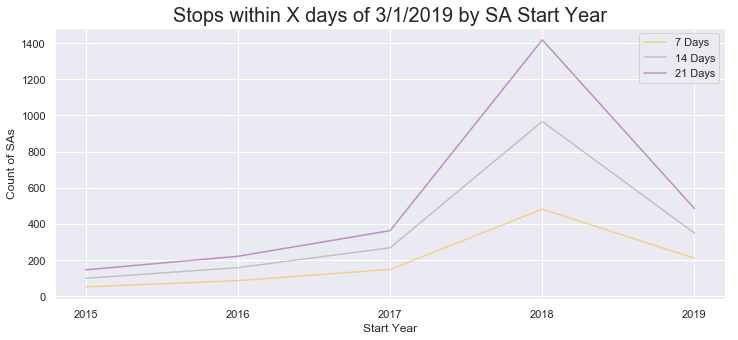

In [134]:
plt1_column_names = ('2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df.loc[((df['STOP_7_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR'] >= '2015'))].groupby('SA_START_YEAR')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='line', color='orange', alpha=.4, grid=True, label='7 Days')
plt1.set_title('Stops within X days of 3/1/2019 by SA Start Year',fontsize= 20)

plt2 = df.loc[((df['STOP_14_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR'] >= '2015'))].groupby('SA_START_YEAR')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='line', color='gray', alpha=.4, grid=True, label='14 Days')

plt3 = df.loc[((df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR'] >= '2015'))].groupby('SA_START_YEAR')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='line', color='purple', alpha=.4, grid=True, label='21 Days')


plt1.set_xlabel('Start Year')
plt1.set_ylabel('Count of SAs')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt1.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

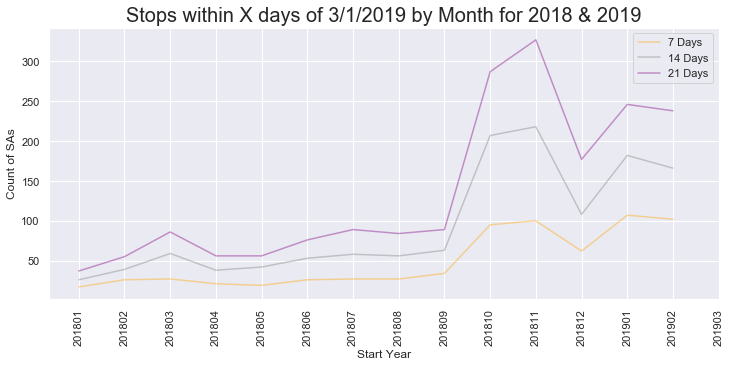

In [135]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days
# Only including a Person if they had service with us before.

plt1_column_names = (#'201501','201502','201503','201504','201505','201506','201507','201508','201509','201510','201511','201512',
                     #'201601','201602','201603','201604','201605','201606','201607','201608','201609','201610','201611','201612',
                     #'201701','201702','201703','201704','201705','201706','201707','201708','201709','201710','201711','201712',
                     '201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                     '201901','201902','201903'#,'201904','201905','201906','201907','201908','201909','201910','201911','201912'
                    )

plt.figure(figsize=(12,5))
plt1 = df.loc[((df['STOP_7_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR_MONTH'] >= '201801'))].groupby('SA_START_YEAR_MONTH')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='line', color='orange', alpha=.4, grid=True, label='7 Days')
plt1.set_title('Stops within X days of 3/1/2019 by Month for 2018 & 2019',fontsize= 20)

plt2 = df.loc[((df['STOP_14_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR_MONTH'] >= '201801'))].groupby('SA_START_YEAR_MONTH')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='line', color='gray', alpha=.4, grid=True, label='14 Days')

plt3 = df.loc[((df['STOP_21_DAYS_FROM_20190301'] == 1) & (df['SA_START_YEAR_MONTH'] >= '201801'))].groupby('SA_START_YEAR_MONTH')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='line', color='purple', alpha=.4, grid=True, label='21 Days')

plt.xticks(rotation=90)
plt1.set_xlabel('Start Year')
plt1.set_ylabel('Count of SAs')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt1.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

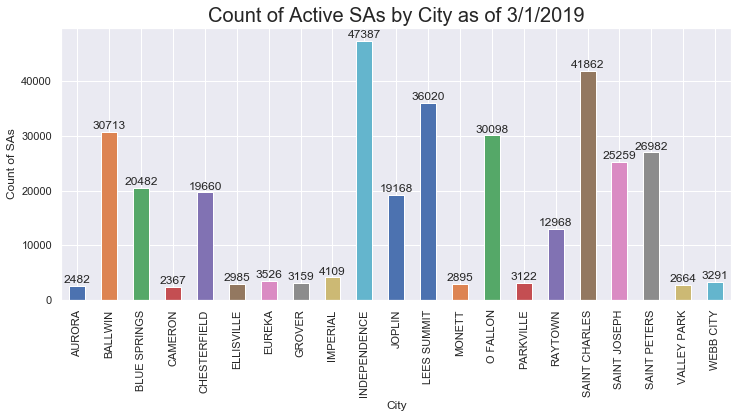

In [136]:
plt.figure(figsize=(12,5))
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_7_DAYS_FROM_20190301'].count().plot(kind='bar')
plt1.set_title('Count of Active SAs by City as of 3/1/2019',fontsize= 20)
plt1.set_xlabel('City')
plt1.set_ylabel('Count of SAs')
#plt1.set_xticklabels(age_bucket_col_names)
add_value_labels(plt1,1)

plt.show()


## Total Counts of Stopped SAs by City by 7 Day, 14 Day, and 21 Day Buckets

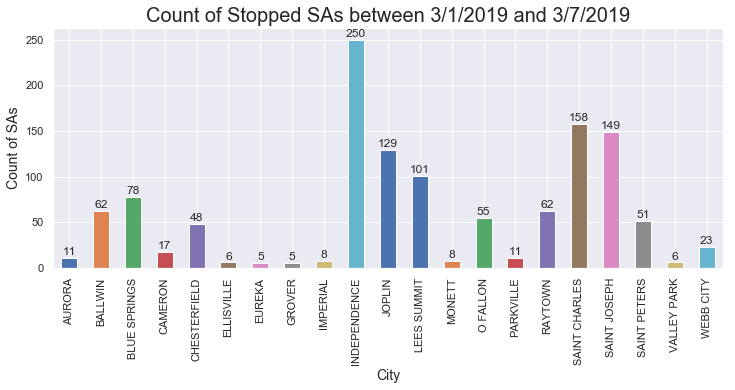

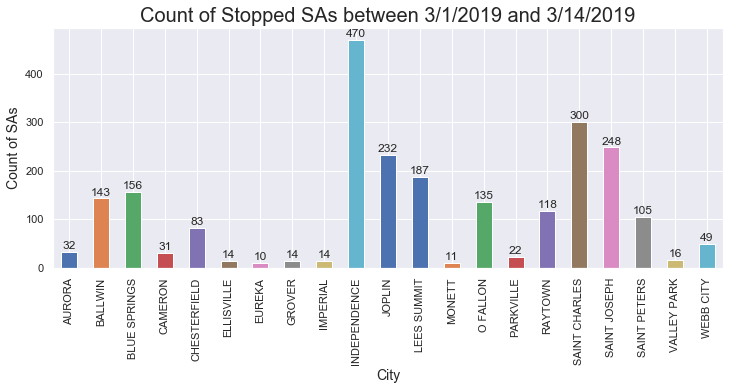

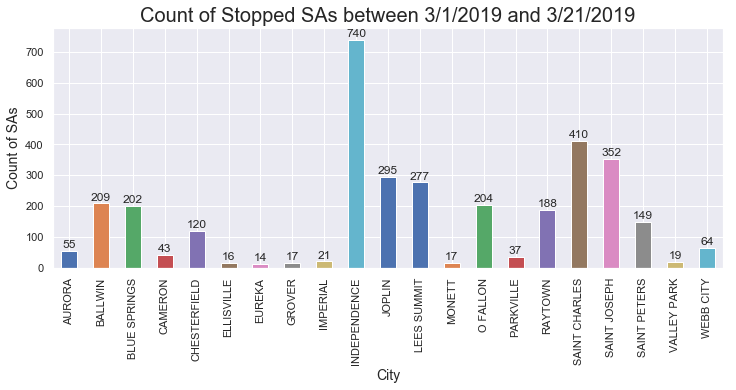

In [137]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt1.set_title('Count of Stopped SAs between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt1,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)
plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt2.set_title('Count of Stopped SAs between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('City',fontsize= 14)
plt2.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt2,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903'))].groupby('CITY')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt3.set_title('Count of Stopped SAs between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('City',fontsize= 14)
plt3.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt3,1)

plt.show()



## % of Active SAs that were Stopped by City by 7 Day, 14 Day, and 21 Day Buckets

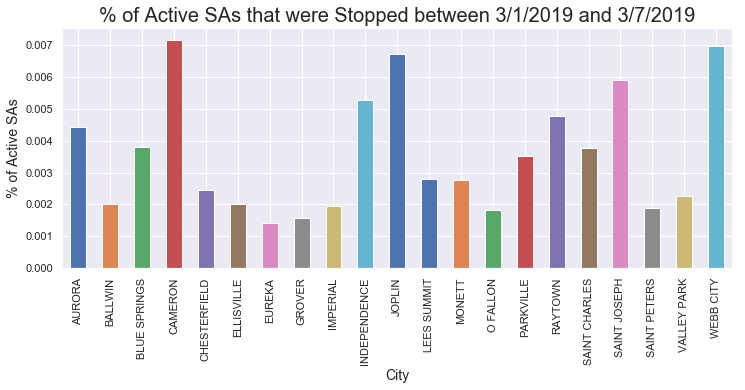

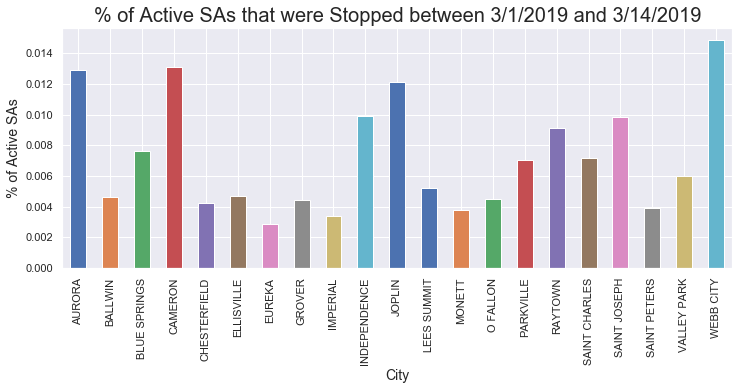

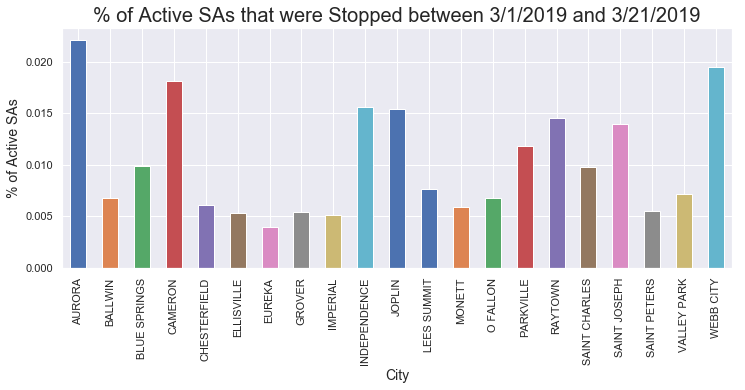

In [138]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_7_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_14_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/14/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt1.set_xlabel('City',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()


## Total Counts of Stopped SAs by Customer Class by 7 Day, 14 Day, and 21 Day Buckets

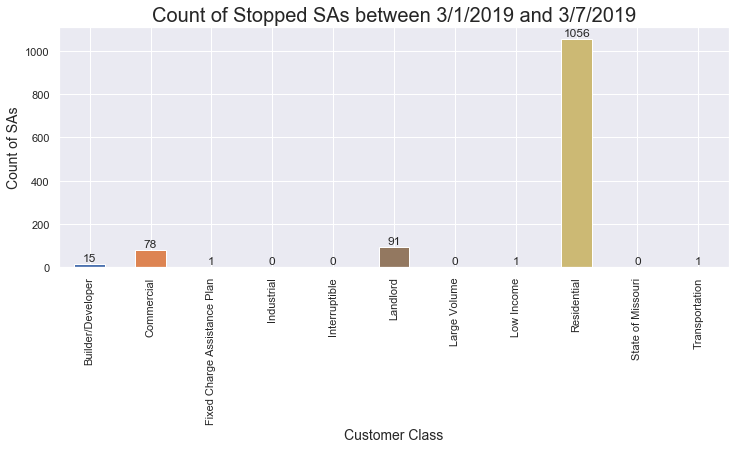

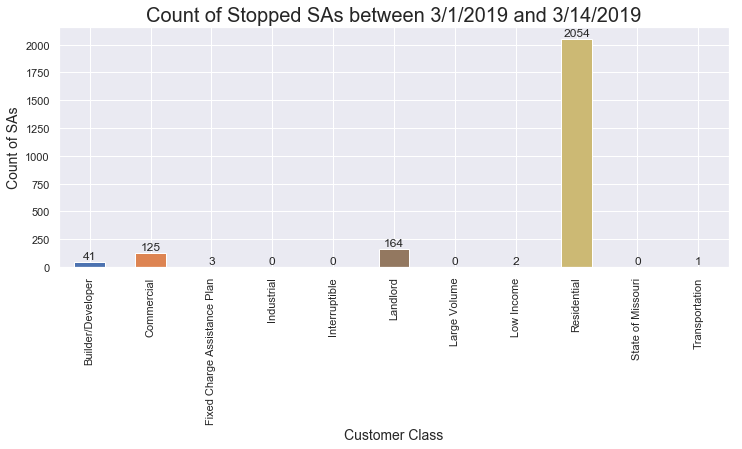

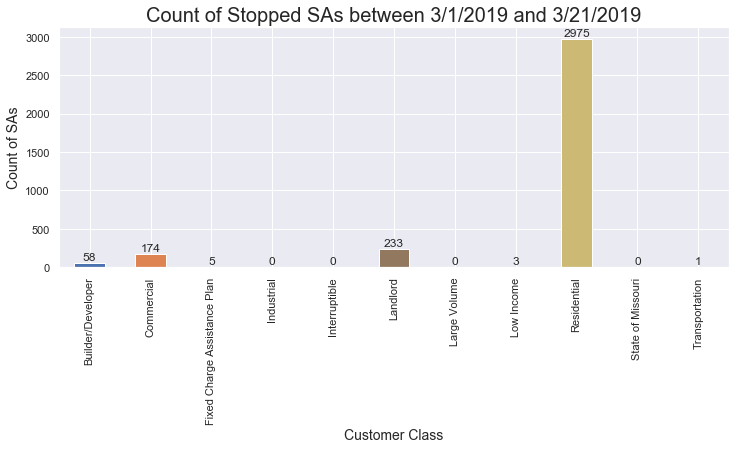

In [139]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_7_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt1.set_title('Count of Stopped SAs between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt1,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)
plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_14_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt2.set_title('Count of Stopped SAs between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('Customer Class',fontsize= 14)
plt2.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt2,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_21_DAYS_FROM_20190301'].sum().plot(kind='bar')
plt3.set_title('Count of Stopped SAs between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('Customer Class',fontsize= 14)
plt3.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt3,1)

plt.show()



## % of Active SAs that were Stopped by Customer Class by 7 Day, 14 Day, and 21 Day Buckets

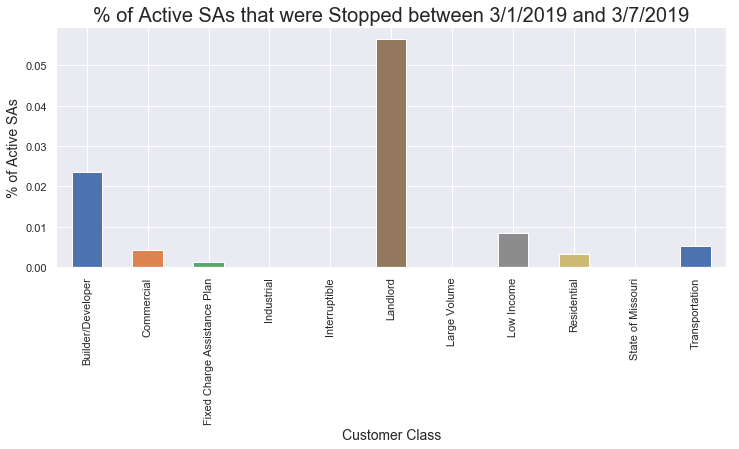

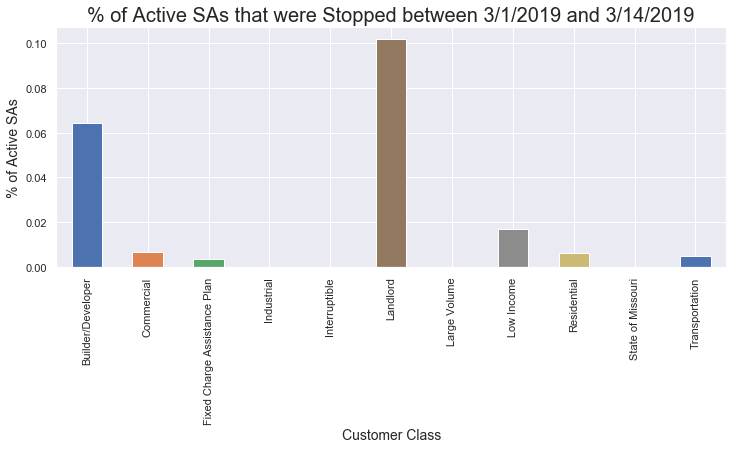

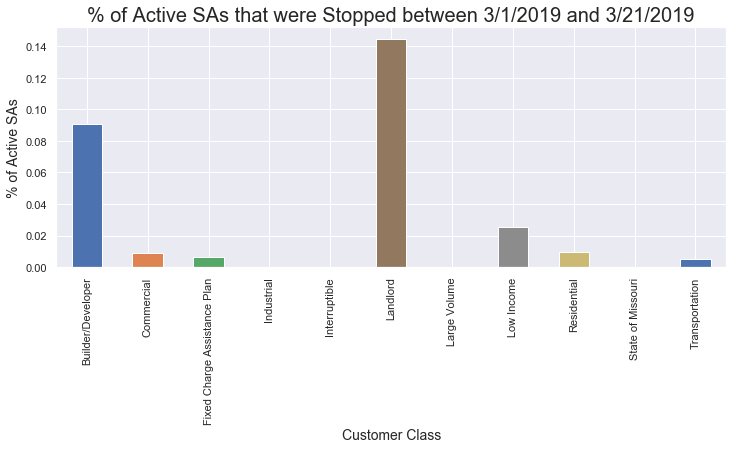

In [140]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_7_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_14_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/14/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('% of Active SAs',fontsize= 14)

plt.show()


## Count of Active SAs that were previously Stopped because of DNP.

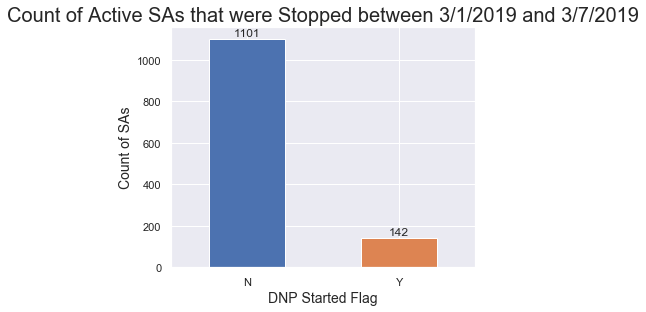

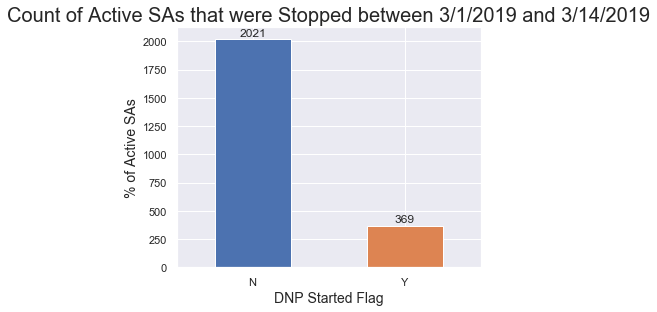

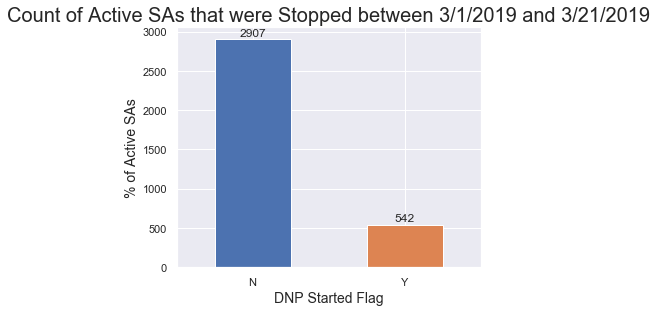

In [169]:
# Counts
plt.figure(figsize=(12,15))
plt.subplot(3,2,1)

plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_7_DAYS_FROM_20190301'] == 1 ) )].groupby('DNP_STARTED_FLAG')['STOP_7_DAYS_FROM_20190301'].count().plot(kind='bar')
plt1.set_title('Count of Active SAs that were Stopped between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('DNP Started Flag',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt1,1)

plt.figure(figsize=(12,15))
plt.subplot(3,2,2)

plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_14_DAYS_FROM_20190301'] == 1 ))].groupby('DNP_STARTED_FLAG')['STOP_14_DAYS_FROM_20190301'].count().plot(kind='bar')
plt2.set_title('Count of Active SAs that were Stopped between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('DNP Started Flag',fontsize= 14)
plt2.set_ylabel('% of Active SAs',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt2,1)

plt.figure(figsize=(12,15))
plt.subplot(3,2,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('DNP_STARTED_FLAG')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='bar')
plt3.set_title('Count of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('DNP Started Flag',fontsize= 14)
plt3.set_ylabel('% of Active SAs',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt3,1)
plt.show()


<Figure size 864x1080 with 0 Axes>

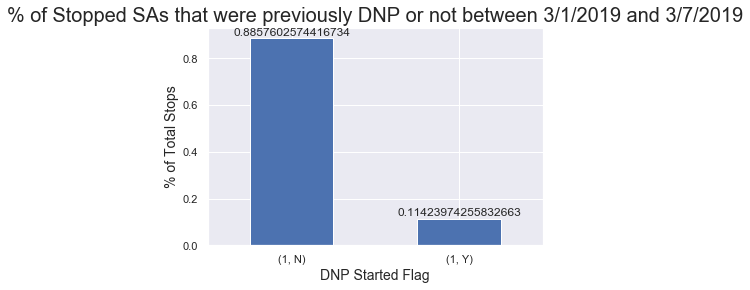

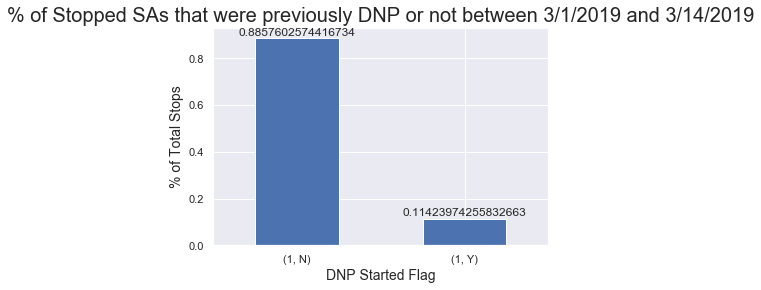

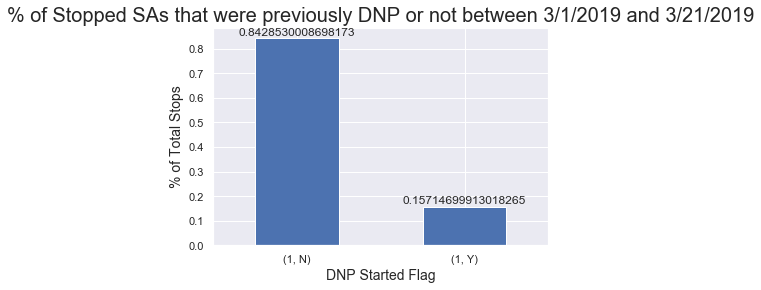

In [205]:

# Percentages
plt.figure(figsize=(12,15))

val1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby(['STOP_7_DAYS_FROM_20190301','DNP_STARTED_FLAG']).agg({'STOP_7_DAYS_FROM_20190301': 'sum'})
val2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby('STOP_7_DAYS_FROM_20190301').agg({'STOP_7_DAYS_FROM_20190301': 'sum'})
val_out = val1.div(val2, level='STOP_7_DAYS_FROM_20190301') * 100

plt1 = val1.div(val2, level='STOP_7_DAYS_FROM_20190301').plot(kind='bar', legend=None)
plt1.set_title('% of Stopped SAs that were previously DNP or not between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('DNP Started Flag',fontsize= 14)
plt1.set_ylabel('% of Total Stops',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt1,1)
plt.show()


val1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby(['STOP_14_DAYS_FROM_20190301','DNP_STARTED_FLAG']).agg({'STOP_14_DAYS_FROM_20190301': 'sum'})
val2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby('STOP_14_DAYS_FROM_20190301').agg({'STOP_14_DAYS_FROM_20190301': 'sum'})
val_out = val1.div(val2, level='STOP_14_DAYS_FROM_20190301') * 100

plt2 = val1.div(val2, level='STOP_14_DAYS_FROM_20190301').plot(kind='bar', legend=None)
plt2.set_title('% of Stopped SAs that were previously DNP or not between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('DNP Started Flag',fontsize= 14)
plt2.set_ylabel('% of Total Stops',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt2,1)
plt.show()


val1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby(['STOP_21_DAYS_FROM_20190301','DNP_STARTED_FLAG']).agg({'STOP_21_DAYS_FROM_20190301': 'sum'})
val2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_21_DAYS_FROM_20190301'] == 1 ))].groupby('STOP_21_DAYS_FROM_20190301').agg({'STOP_21_DAYS_FROM_20190301': 'sum'})
val_out = val1.div(val2, level='STOP_21_DAYS_FROM_20190301') * 100

plt3 = val1.div(val2, level='STOP_21_DAYS_FROM_20190301').plot(kind='bar', legend=None)
plt3.set_title('% of Stopped SAs that were previously DNP or not between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('DNP Started Flag',fontsize= 14)
plt3.set_ylabel('% of Total Stops',fontsize= 14)
plt.xticks(rotation=0)
add_value_labels(plt3,1)
plt.show()

In [189]:
val1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby(['STOP_7_DAYS_FROM_20190301','DNP_STARTED_FLAG']).agg({'STOP_7_DAYS_FROM_20190301': 'sum'})
val2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903')  & (df['STOP_7_DAYS_FROM_20190301'] == 1 ))].groupby('STOP_7_DAYS_FROM_20190301').agg({'STOP_7_DAYS_FROM_20190301': 'sum'})
val_out = val1.div(val2, level='STOP_7_DAYS_FROM_20190301') 
print(val1)
print(val2)
print(val_out)

                                            STOP_7_DAYS_FROM_20190301
STOP_7_DAYS_FROM_20190301 DNP_STARTED_FLAG                           
1                         N                                      1101
                          Y                                       142
                           STOP_7_DAYS_FROM_20190301
STOP_7_DAYS_FROM_20190301                           
1                                               1243
                                            STOP_7_DAYS_FROM_20190301
STOP_7_DAYS_FROM_20190301 DNP_STARTED_FLAG                           
1                         N                                   0.88576
                          Y                                   0.11424


## ANNEX

In [142]:
df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & df['STOP_21_DAYS_FROM_20190301'] == 1 )].groupby('DNP_STOPPED_FLAG').count()

,CIS_DIVISION,ACCOUNT_ID,CUSTOMER_CLASS_CODE,CUSTOMER_CLASS_DESCRIPTION,PERSON_ID,SA_START_DATE,SA_START_YEAR,SA_START_YEAR_MONTH,SA_END_DATE,SA_END_YEAR,...,PREMISE_PRIOR_STOP_DATE,PERSON_PRIOR_STOP_DATE,PREMISE_DAYS_INACTIVE_BEFORE,PERSON_DAYS_INACTIVE_BEFORE,PREMISE_DAYS_ACTIVE_BEFORE,PERSON_DAYS_ACTIVE_BEFORE,ACTIVE_DIFF_FROM_20190301,STOP_7_DAYS_FROM_20190301,STOP_14_DAYS_FROM_20190301,STOP_21_DAYS_FROM_20190301
DNP_STOPPED_FLAG,,,,,,,,,,,,,,,,,,,,,
N,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809,...,1818,1204,2809,2809,2809,2809,2809,2809,2809,2809
Y,640,640,640,640,640,640,640,640,640,640,...,466,292,640,640,640,640,640,640,640,640


In [143]:
df['DNP_STOPPED_FLAG'].loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & df['STOP_21_DAYS_FROM_20190301'] == 1 )]

SA_ID
85423559880     N
18796982808     Y
107207207100    N
84433723212     N
2737786524      N
58488245688     N
909856128       N
34112231076     N
655325712       N
700971984       Y
74397754536     N
1165575000      N
35774561724     N
84126663528     N
99154145316     Y
95166712572     N
1028663304      N
82289286036     N
26837169792     N
65332098660     N
1601761356      N
28312482900     N
1747929876      Y
85303202640     N
1001651628      N
58072056240     N
1895988168      Y
2050924140      N
93371611704     Y
45069878676     N
               ..
103121437140    N
118041260796    N
118200407100    Y
11958085644     N
1642505424      Y
99641218260     N
27198743712     N
118356258552    N
119392444704    N
23925311028     N
119660422860    N
43972750716     N
20720947944     N
118508413176    N
78529004136     N
30442319532     N
52027345968     N
34923373260     Y
118737250236    N
118787301240    N
118856528220    N
43961243460     Y
119094725388    N
89727880968     Y
1190

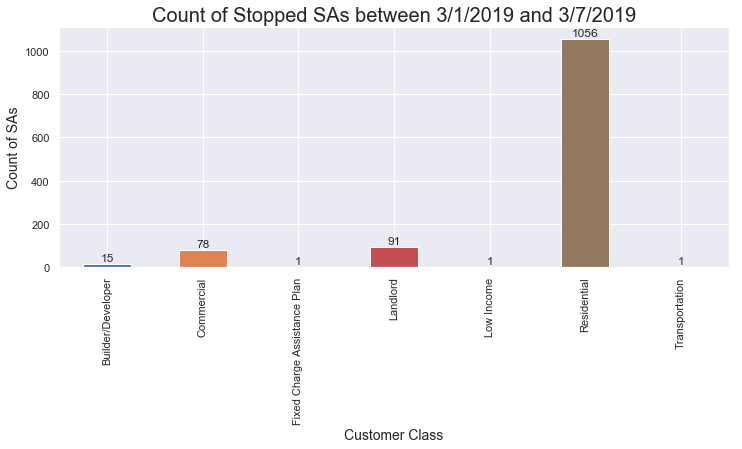

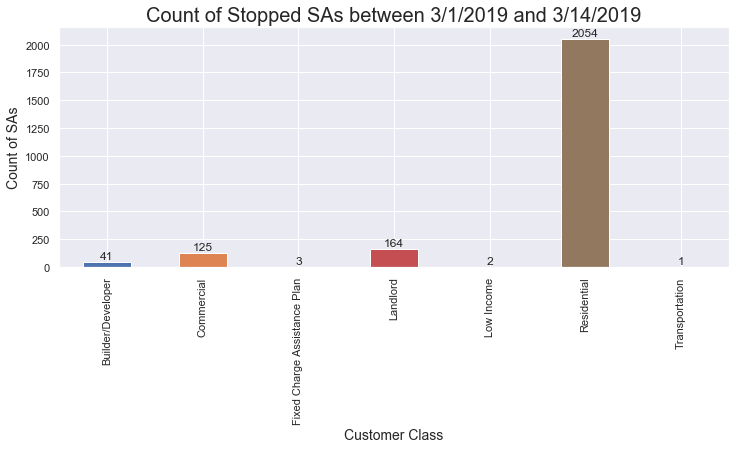

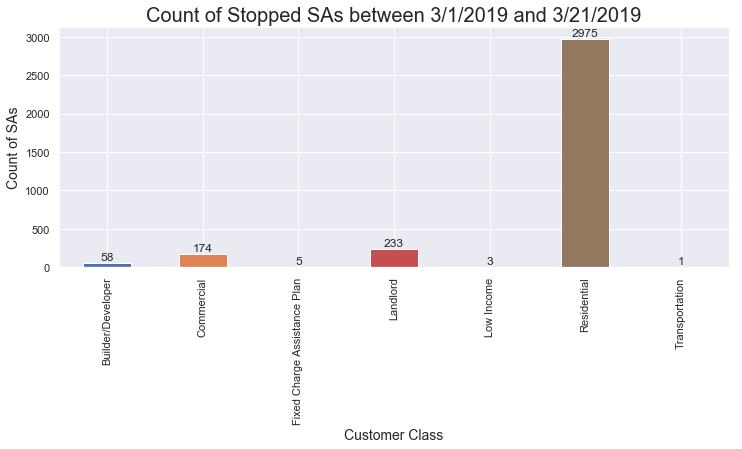

In [144]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_7_DAYS_FROM_20190301'] == 1))].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_7_DAYS_FROM_20190301'].count().plot(kind='bar')
plt1.set_title('Count of Stopped SAs between 3/1/2019 and 3/7/2019',fontsize= 20)
plt1.set_xlabel('Customer Class',fontsize= 14)
plt1.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt1,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,2)
plt2 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_14_DAYS_FROM_20190301'] == 1))].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_14_DAYS_FROM_20190301'].count().plot(kind='bar')
plt2.set_title('Count of Stopped SAs between 3/1/2019 and 3/14/2019',fontsize= 20)
plt2.set_xlabel('Customer Class',fontsize= 14)
plt2.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt2,1)

plt.show()

plt.figure(figsize=(12,15))
plt.subplot(3,1,3)

plt3 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') & (df['STOP_21_DAYS_FROM_20190301'] == 1))].groupby('CUSTOMER_CLASS_DESCRIPTION')['STOP_21_DAYS_FROM_20190301'].count().plot(kind='bar')
plt3.set_title('Count of Stopped SAs between 3/1/2019 and 3/21/2019',fontsize= 20)
plt3.set_xlabel('Customer Class',fontsize= 14)
plt3.set_ylabel('Count of SAs',fontsize= 14)
add_value_labels(plt3,1)

plt.show()



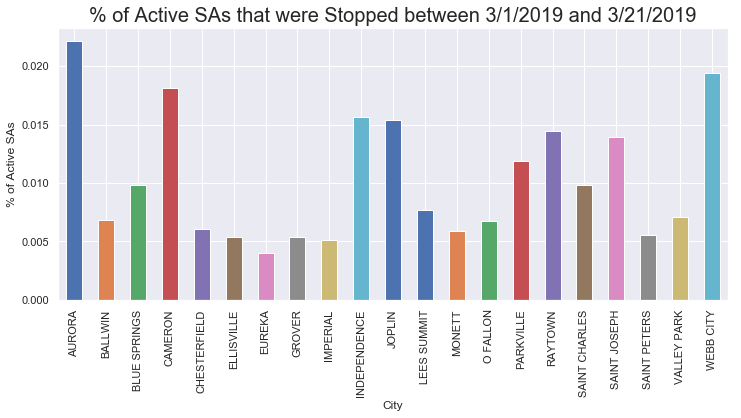

In [145]:
df.groupby('CITY')['STOP_21_DAYS_FROM_20190301'].mean()

plt.figure(figsize=(12,5))
plt1 = df.loc[((df['SA_START_YEAR_MONTH']  < '201903') & (df['SA_END_YEAR_MONTH'] >= '201903') )].groupby('CITY')['STOP_21_DAYS_FROM_20190301'].mean().plot(kind='bar')
plt1.set_title('% of Active SAs that were Stopped between 3/1/2019 and 3/21/2019',fontsize= 20)
plt1.set_xlabel('City')
plt1.set_ylabel('% of Active SAs')
#plt1.set_xticklabels(age_bucket_col_names)
# add_value_labels(plt1,1)

plt.show()


In [206]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days
# Only including a Person if they had service with us before.

plt1_column_names = ('2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_STOP_YEAR'] >= '2015')&(df['SA_STOP_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0)&(df['PERSON_PRIOR_STOP_DATE'].notnull()))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Completely Off Before Starting Service')

plt2 = df[((df['SA_STOP_YEAR'] >= '2015')&(df['SA_STOP_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0)&(df['PERSON_PRIOR_STOP_DATE'].notnull()))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt1.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

KeyError: 'SA_STOP_YEAR'

<Figure size 864x360 with 0 Axes>

In [ ]:
plt1 = df[(df['SA_START_YEAR'] >= '2013')].groupby('SA_START_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Overall New Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

In [ ]:
plt1 = df[((df['SA_END_YEAR'] >= '2013') & (df['SA_END_YEAR'] <= '2019'))].groupby('SA_END_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Overall Stopped Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

In [ ]:
plt1 = df[((df['SA_START_YEAR'] >= '2013')&(df['CUSTOMER_CLASS_CODE'] == 'RES'))].groupby('SA_START_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Residential Customer New Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

In [ ]:
plt1 = df[((df['SA_END_YEAR'] >= '2013') & (df['SA_END_YEAR'] <= '2019')
           &(df['CUSTOMER_CLASS_CODE'] == 'RES'))].groupby('SA_END_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Residential Customer Stopped Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

In [ ]:
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].mean().plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year (only what is available on Stop Year)')

plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2014'].mean().plot(kind='line', color='blue', grid=True, label='2014')
plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].mean().plot(kind='line', color='green', grid=True, label='2015')
plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].mean().plot(kind='line', color='red', grid=True, label='2016')
plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].mean().plot(kind='line', color='pink', grid=True, label='2017')
plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].mean().plot(kind='line', color='purple', grid=True, label='2018')
plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].mean().plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()

In [ ]:
--20190910
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum().divide(df['STOP_2013'][((df['STOP_2013'] == 1))].sum()).plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year')

plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2014'].sum().divide(df['STOP_2014'][((df['STOP_2014'] == 1))].sum()).plot(kind='line', color='blue', grid=True, label='2014')
plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].sum().divide(df['STOP_2015'][((df['STOP_2015'] == 1))].sum()).plot(kind='line', color='green', grid=True, label='2015')
plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].sum().divide(df['STOP_2016'][((df['STOP_2016'] == 1))].sum()).plot(kind='line', color='red', grid=True, label='2016')
plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].sum().divide(df['STOP_2017'][((df['STOP_2017'] == 1))].sum()).plot(kind='line', color='pink', grid=True, label='2017')
plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].sum().divide(df['STOP_2018'][((df['STOP_2018'] == 1))].sum()).plot(kind='line', color='purple', grid=True, label='2018')
plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].sum().divide(df['STOP_2019'][((df['STOP_2019'] == 1))].sum()).plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()

In [ ]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].mean()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

In [ ]:
df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].count()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

In [ ]:
df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].sum()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

In [ ]:
df[((df['SA_START_YEAR'] == '2017'))].groupby(('SA_END_YEAR')).count()

In [ ]:
df[((df['SA_START_YEAR'] == '2017'))].count()

In [ ]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum()

In [ ]:
df['STOP_2013'][((df['STOP_2013'] == 1))].sum()

In [ ]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum().divide(df['STOP_2013'][((df['STOP_2013'] == 1))].sum())

In [ ]:
df.groupby(['SA_END_YEAR'])['SA_START_YEAR'].describe()

In [ ]:

# Average # of Days Person was Off Before Starting Service

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Off Before Starting Service')

plt2 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

#plt1.set_xticks(np.arange(len(plt1_column_names)))

#plt1.set_xticklabels(plt1_column_names)

#h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

In [ ]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Completely Off Before Starting Service')

plt2 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

#plt1.set_xticks(np.arange(len(plt1_column_names)))

#plt1.set_xticklabels(plt1_column_names)

#h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

In [ ]:
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year (only what is available on Stop Year)')

#plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='blue', grid=True, label='2014')
#plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].mean().plot(kind='line', color='green', grid=True, label='2015')
#plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].mean().plot(kind='line', color='red', grid=True, label='2016')
#plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].mean().plot(kind='line', color='pink', grid=True, label='2017')
#plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].mean().plot(kind='line', color='purple', grid=True, label='2018')
#plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].mean().plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()